In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("session_1_data_train.csv")
test_data=pd.read_csv("session_1_data_test.csv")

In [3]:
train_data['label'] = train_data['label'].apply(lambda x: x[:-1])
test_data['label'] = test_data['label'].apply(lambda x: x[:-1])

In [4]:
def replace_label(val):
    if val=='normal':
        return 'normal'
    else:
        return 'attack'   

In [5]:
train_data['label']=train_data['label'].apply(replace_label,1)
test_data['label']=test_data['label'].apply(replace_label,1)

In [6]:
train_data.drop_duplicates(subset=None, keep='first', inplace=True)
test_data.drop_duplicates(subset=None, keep='first', inplace=True)

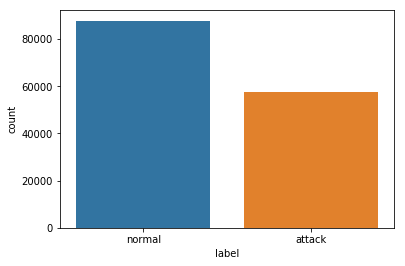

In [7]:
sns.countplot(x='label',data=train_data)

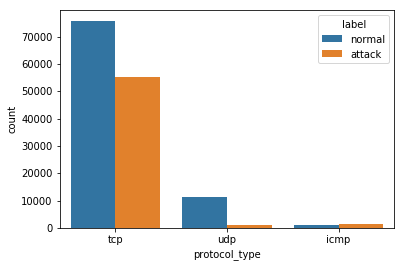

In [8]:
sns.countplot(x='protocol_type',hue='label',data=train_data)

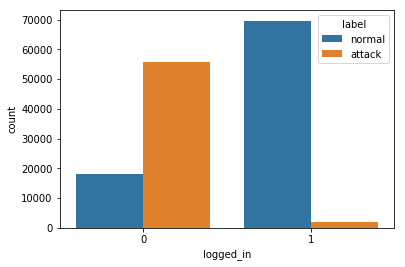

In [9]:
sns.countplot(x='logged_in',hue='label',data=train_data)

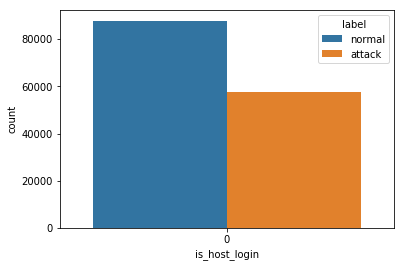

In [10]:
sns.countplot(x='is_host_login',hue='label',data=train_data)

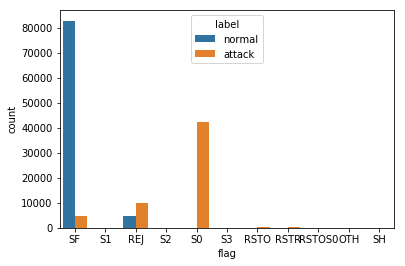

In [11]:
sns.countplot(x='flag',hue='label',data=train_data)

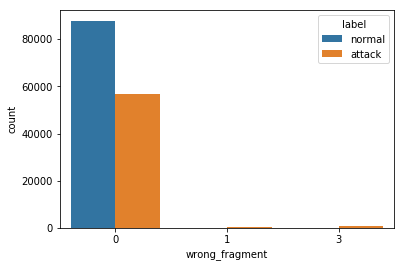

In [12]:
sns.countplot(x='wrong_fragment',hue='label',data=train_data)

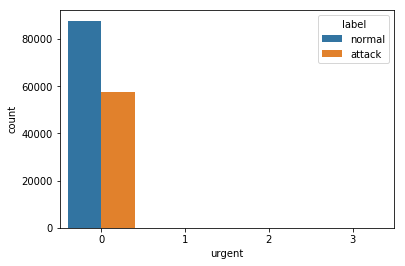

In [13]:
sns.countplot(x='urgent',hue='label',data=train_data)

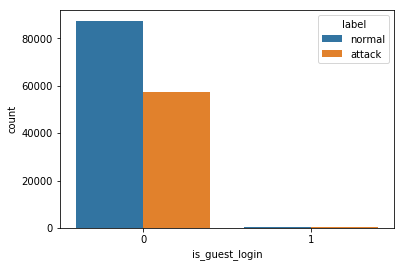

In [14]:
sns.countplot(x='is_guest_login',hue='label',data=train_data)

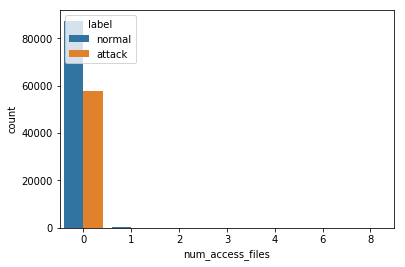

In [15]:
sns.countplot(x='num_access_files',hue='label',data=train_data)

In [16]:
dummies_train=pd.get_dummies(train_data)
dummies_test=pd.get_dummies(test_data)

In [17]:
for i in list(dummies_train.columns):
    if i not in list(dummies_test.columns):
        print(i)

service_red_i
service_urh_i


In [18]:
for i in list(dummies_test.columns):
    if i not in list(dummies_train.columns):
        print(i)

service_icmp


In [19]:
train_data=dummies_train.drop(['service_red_i','service_urh_i'],axis=1)
test_data=dummies_test.drop(['service_icmp'],axis=1)

In [20]:
X_train=train_data.drop("label_normal",axis=1)
y_train=(train_data["label_normal"])
x_test=test_data.drop("label_normal",axis=1)
y_test=test_data["label_normal"]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
predictions=logmodel.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     29373
           1       0.87      0.98      0.92     47913

   micro avg       0.90      0.90      0.90     77286
   macro avg       0.92      0.87      0.88     77286
weighted avg       0.90      0.90      0.89     77286



In [25]:
print(confusion_matrix(y_test,predictions))

[[22049  7324]
 [  740 47173]]


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(x_test)  
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29373
           1       1.00      1.00      1.00     47913

   micro avg       1.00      1.00      1.00     77286
   macro avg       1.00      1.00      1.00     77286
weighted avg       1.00      1.00      1.00     77286



In [27]:
print(confusion_matrix(y_test,y_pred))

[[29373     0]
 [    0 47913]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9)

In [29]:
neighours=neigh.fit(X_train, y_train) 

In [30]:
y_predict = neighours.predict(x_test)  

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     29373
           1       0.90      0.99      0.94     47913

   micro avg       0.93      0.93      0.93     77286
   macro avg       0.94      0.91      0.92     77286
weighted avg       0.93      0.93      0.93     77286



In [32]:
print(confusion_matrix(y_test,y_predict))

[[24057  5316]
 [  327 47586]]
